In [1]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#seaborn
# 붓꽃 데이터 불러오기
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

X = df.iloc[0:100, [0, 2]].values   #df.loc[0:100, ['fist_name']]      # 앞 100개 샘플의 컬럼0(꽃받침 길이)과 컬럼2(꽃잎 길이) 값을 가지고 옴
X1 = df.iloc[0:100, [0, 2]]
print(df)
print(X1)
y = df.iloc[0:100, 4].values              # 앞 100개 샘플의 정답값(꽃종류) 을 가지고 옴
y1 = df.iloc[0:100, 4].values   
y = np.where(y == 'Iris-setosa', 0, 1)   # 값이 Iris-setosa이면 0, 아니면 1로 표기함

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
      0    2
0   5.1  1.4
1   4.9  1.4
2   4.7  1.3
3   4.6  1.5
4   5.0  1.4
..  ...  ...
95  5.7  4.2
96  5.7  4.2
97  6.2  4.3
98  5.1  3.0
99  5.7  4.1

[100 rows x 2 columns]


In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=np.where(Z>=0.5,1,0)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): #[0,1] 처음 반복에서 idx=0 cl=0 그 다음에는 idx=1 cl=1
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    #print(idx)
    #print(cl)
    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

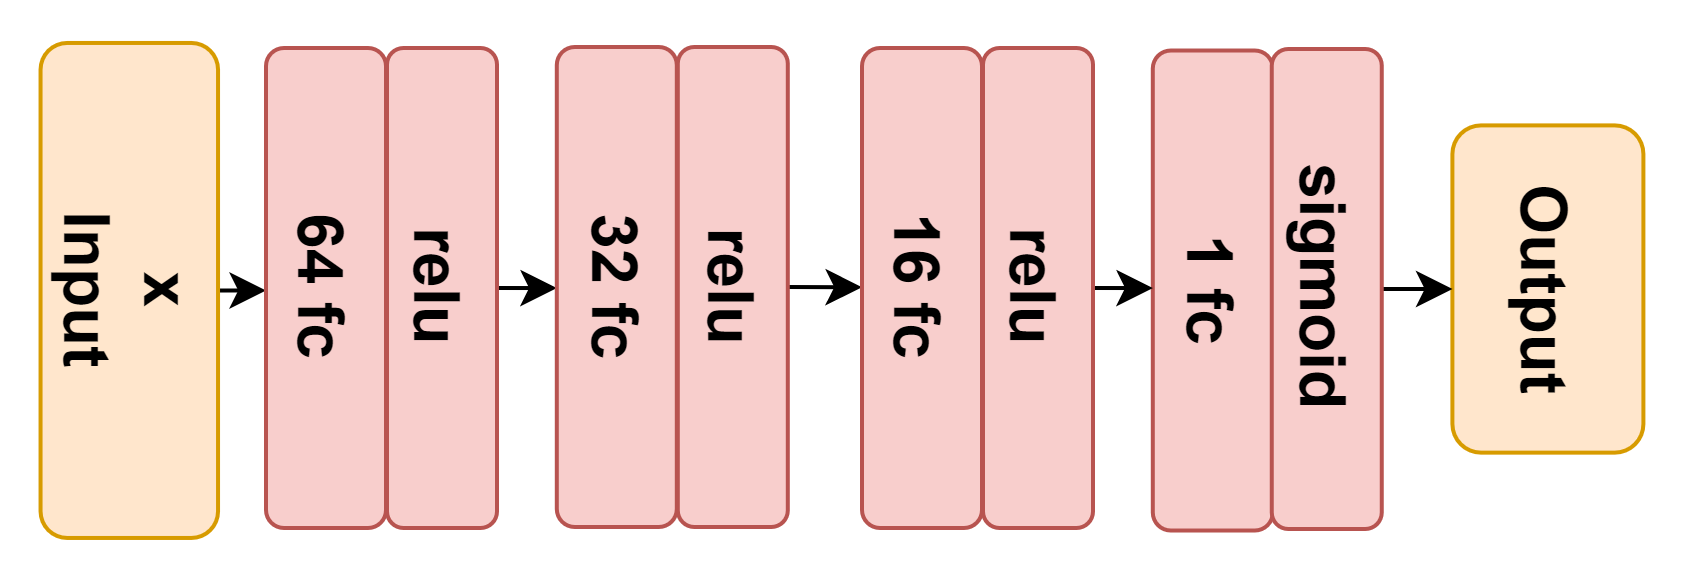

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.7217 - accuracy: 0.1200
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5200
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.9700
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.9700
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6310 - accuracy: 0.9700
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.9700
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.9800
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.9800
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.9900
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.9900
Epoch 11/100
4/4 [===========

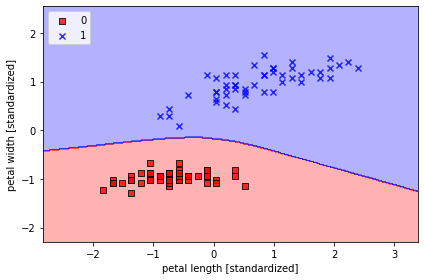

In [4]:
import matplotlib.pyplot as plt
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_std, y, epochs=100)

plot_decision_regions(X_std, y, classifier=model)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()